#### [RQ4] 

In [26]:
# import required libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import datetime
from IPython.display import display

Matplotlib is building the font cache; this may take a moment.


##### - RQ 4.1
Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id :

In [172]:
def get_posts_by_profile_id(profile_id):
    
    
    ''' Arg: profile id, as an integer number, of the user whose posts we are looking for.
    
        Returns: posts that belong to the given Profile ID as a pandas DataFrame. '''
    
    posts_list = []
    
    for chunk in tqdm(pd.read_csv('~/instagram_posts.zip', delimiter='\t', chunksize=500000)):
        
        chunk.profile_id.fillna(0, inplace=True)                      # Replace Null Profile ID with 0
        chunk['profile_id'] = chunk['profile_id'].astype("int")       # Cast Profile ID column to a specified dtype (integer)
        
        result = chunk.loc[chunk['profile_id'] == profile_id]         #Access a rows and columns by label = profile_id
        if not result.empty:
            posts_list.append(result)                             ## if posts published from Profile ID are found, they stored in list
                   
    if len(posts_list) == 0:                                        ## Converting posts_list to pandas DataFrame
        output = None
        print("Error : no posts found for profile_id = ", profile_id )
    else:
        output = pd.concat(posts_list)
        print("profile_id =", profile_id, "\tdata.shape :", output.shape)
        output.head()
        
    return output             #return the posts that belong to the given Profile ID as a pandas DataFrame

In [173]:
data = get_posts_by_profile_id(1607309412)   #works (user with multiple posts published)
#data = get_posts_by_profile_id(1837592700)  #works (user with just one post published)
#data = get_posts_by_profile_id(1234)        #works too for non-existent profile_id

data.head()

86it [05:21,  3.74s/it]

profile_id = 1607309412 	data.shape : (74, 10)


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
233067,28607526,3851869,ByAFx7gnNhZ,1607309412,2.448736e+08,2019-05-28 11:36:28.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,1,0
241977,28616591,3851869,BxtZ7__Fosq,1607309412,3.621726e+14,2019-05-21 05:27:02.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0,0
319192,28694641,3851869,ByB2YpbnoZs,1607309412,2.086910e+05,2019-05-29 04:00:25.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,4,0
637098,29019247,3851869,BwUPb5dFZCR,1607309412,9.268474e+14,2019-04-16 14:22:51.000,1,📞 สนใจตัวช่วย#dwfifteen🔥เพิ่มการเผาผลาญไขมัน\n...,1,0
1300143,29693418,3851869,ByJwLb5nTZ-,1607309412,2.509223e+08,2019-06-01 05:40:06.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0,0


##### - RQ 4.2
Write another function that, given an input n ( an integer ), will return the posts that belong to the n top posted profiles ( top n profiles that have posted the highest number of posts ) :

##### *Approach*:
Task divided into two sub functions:
- find top n posted profiles from instagram_profiles.csv with **get_nposts_sorted(n)** function
- find their posts from instagram_posts.csv with **posts_top_n_pubblischers(n)** function:  matching sid from profiles.csv with sid_profile in posts.csv



In [2]:
def get_nposts_sorted(n):
    
    ''' Arg : The function takes an integer number n as input.
    
        Return : A pandas DataFrame from the instagram_profiles.csv sorted for number of posts in decreasing order '''
    
    appended_data = []
    
    for chunk in tqdm(pd.read_csv('~/instagram_profiles.zip',sep='\t', chunksize=500000)):
        appended_data.append(chunk)

    df_nposts = pd.concat(appended_data)

    df_nposts.n_posts.fillna(0, inplace=True)                   # Replace n_posts with 0
    df_nposts.profile_id.fillna(0, inplace=True)                # Replace Null Profile ID with 0
    
    
    df_nposts['profile_id'] = df_nposts['profile_id'].astype("int")     # Cast Profile ID column to a specified dtype (integer)
    df_nposts['n_posts'] = df_nposts['n_posts'].astype("int")           # Cast n_posts column to a specified dtype (integer)
    df_nposts['sid'] = df_nposts['sid'].astype("int")                   # Cast sid column to a specified dtype (integer)
    
    
    result = df_nposts.nlargest(n,'n_posts')
    
    return result

In [3]:
def posts_top_n_pubblischers(n):
    
    ''' Arg: The function takes an integer number n as input ( n = top profiles that have posted the highest number of posts )
    
        Returns: the posts that belong to the top n publischers as a list of pandas DataFrame objects '''
    
    data_profiles = get_nposts_sorted(n)
    
    finale = []
    
    for chunk in tqdm(pd.read_csv('~/instagram_posts.zip', delimiter='\t', chunksize=500000)):
        chunk.sid_profile.fillna(0, inplace=True)                 # Replace Null Sid_Profile with 0
        chunk.profile_id.fillna(0, inplace=True)                  # Replace Null Profile ID with 0
        chunk['sid_profile'] = chunk['sid_profile'].astype(int)   # Cast Sid_Profile column to a specified dtype (integer)
        chunk['profile_id'] = chunk['profile_id'].astype(int)     # Cast Profile ID column to a specified dtype (integer)
        
        result = chunk.loc[chunk['sid_profile'].isin(list(data_profiles.sid))]    
        
        if not result.empty:
            finale.append(result)
            
    data = pd.concat(finale)
    output=[]
    
    for i in list(data_profiles.sid):
        result = data.loc[data['sid_profile'] == i]
        output.append(result)
    
    return output, data_profiles
                #return the posts that belong to the top n publischers as a list of pandas DataFrame objects (one for each user)
                #list in decreasing order from the top publisher 

In [ ]:
data, data2 = posts_top_n_pubblischers(int(input()))

**Comment :** <br>
It should be noted the inconsistency of the dataset.
<br>For profiles that have posted the highest number of posts according to instagram_profiles.csv, we can find just few records in instagram_posts.csv

In [197]:
#data, data2 = posts_top_n_pubblischers(int(input()))

c=1
for i in range(0,len(data)):
    try:
        print("{}  → {:<25} profile id: {:<20} tot_posts : {:<15} n_posts_found : {}".format(c,data2.profile_name.iloc[i], 
                                                                                                   data[i].profile_id.iloc[0],     
                                                                                                   data2.n_posts.iloc[i],
                                                                                                   data[i].shape[0]))
        c+=1
    except IndexError:
        print ("{} → {:<25} profile id: {:<20} tot_posts : {:<15} n_posts_found : {}".format(c,data2.profile_name.iloc[i],
                                                                                                   data2.profile_id.iloc[i],
                                                                                                   data2.n_posts.iloc[i],
                                                                                                   data[i].shape[0]))


1  → jasem33312                profile id: 199664772            tot_posts : 183730               n_posts_found : 21
2  → koenigpic                 profile id: 8563366588           tot_posts : 142428               n_posts_found : 15
3  → rudyanto62                profile id: 1273455368           tot_posts : 126340               n_posts_found : 25
4  → hometown_ni               profile id: 9813508              tot_posts : 125220               n_posts_found : 27
5  → dwfitfiber_thailand       profile id: 1607309412           tot_posts : 117262               n_posts_found : 74
6  → waxking911                profile id: 1087613619           tot_posts : 117099               n_posts_found : 38
7  → gamt_official             profile id: 1603889832           tot_posts : 113780               n_posts_found : 67
8  → collarosedw_official      profile id: 218172998            tot_posts : 113182               n_posts_found : 25
9  → gamt_authentic            profile id: 285549744            tot_post

In [200]:
for df in data:
    display(df.head(2))   ## to see data.head for each top publisher profile

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
9592952,21205477,3661552,Bq3hP3Khp8J,199664772,1.029593e+09,2018-12-02 03:03:33,1,NaN,0.0,0.0
9592953,21205482,3661552,Bq3hN53hUsD,199664772,1.029593e+09,2018-12-02 03:03:17,1,NaN,0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
24956847,9253738,3288809,BxJpvMrpl0n,8563366588,219610759.0,2019-05-07 02:12:26,1,NaN,0.0,0.0
24978956,9253755,3288809,BxJpeX2pXeN,8563366588,219610759.0,2019-05-07 08:10:08,1,NaN,0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
11228406,11234220,3970193,BpfufadAl1f,1273455368,378633680.0,2018-10-29 00:46:06,1,NaN,3.0,0.0
12360807,39883137,3970193,Bz6mD1VpaJB,1273455368,NaN,2019-07-15 01:25:52,1,NaN,2.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
2700732,31109333,3621669,BuUnJu0Al2B,9813508,344861278.0,2019-02-25 23:47:25,2,NaN,1.0,0.0
2701237,31109320,3621669,BuUoORyAH_f,9813508,344861278.0,2019-02-25 23:56:40,1,NaN,1.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
233067,28607526,3851869,ByAFx7gnNhZ,1607309412,2.448736e+08,2019-05-28 11:36:28,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,1.0,0.0
241977,28616591,3851869,BxtZ7__Fosq,1607309412,3.621726e+14,2019-05-21 05:27:02,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
592982,28973172,345591,BsImXwXgQHo,1087613619,429994336.0,2019-01-02 14:46:48,1,NaN,0.0,0.0
593003,28973171,345591,BsIqY_RA9EP,1087613619,429994336.0,2019-01-02 15:21:55,1,NaN,1.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
494943,28873428,3944512,BxjqpeJhofB,1603889832,2.971150e+08,2019-05-17 10:40:38,1,"#gamt 1,290 free ems #gamtthailand #gamtsungla...",4.0,0.0
637087,29019245,3944512,BwUPb5mhGKA,1603889832,9.268474e+14,2019-04-16 14:22:51,1,📞 สนใจตัวช่วย#dwfifteen🔥เพิ่มการเผาผลาญไขมัน\n...,1.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
6309050,34925542,3851808,ByFkkDxBlTF,218172998,6.752505e+14,2019-05-30 14:41:39,1,หุ่นไซส์ S ที่ใครๆก็ปรารถนาอยากจะมี❗️❗️\nส่วนเ...,1.0,0.0
11427137,11776237,3851808,Bw3xOZVFTfl,218172998,2.362721e+08,2019-04-30 09:31:32,1,"☝🏻✨ปลุกความมั่นใจทุกเช้ากับ "" DW FITFIBER ""\nไ...",0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
11565095,12683706,3868432,Bv9WuDjA_my,285549744,6.338327e+14,2019-04-07 17:03:58,1,#gamt 1290.- #รับตัวแทนจำหน่ายรายได้ดี #รับหิ...,5.0,0.0
11565096,14718062,3868432,BwyQXF_ASSO,285549744,3.514934e+08,2019-04-28 06:08:09,1,#gamt 1290.- #เช่าชุดราตรีรามอินทรา #ศูนย์การค...,0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments


##### - RQ 4.3
What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv ?

In [190]:
col_names = ['profile_id', 'tot_likes', 'tot_comments', 'likes_mean','comments_mean','posts_found']

df = pd.DataFrame( columns = col_names) ## create an empty pd.dataframe

data, data2 = posts_top_n_pubblischers(10)  ## call to the previous written function

for i in range(len(data)):
    try:
        L = [str(data[i].profile_id.iloc[0]), 
             int(sum(data[i].numbr_likes)),int(sum(data[i].number_comments)), 
             round(data[i].numbr_likes.mean(),2), round(data[i].number_comments.mean(),3), 
             int(data[i].shape[0])]
        
        df.loc[i] = L       ## insert list L as a row in df DataFrame
        
    except IndexError:
        print("No results for user ", i)
        

df = df.reindex(list(range(0, 10))).reset_index(drop=True)

df.insert(1, 'profile_name', list(data2.profile_name))
df.insert(7, 'all_posts', list(data2.n_posts))
df.loc[df.index[-1], 'profile_id'] = data2.iloc[-1].profile_id 


df


10it [00:21,  2.15s/it]
86it [05:20,  3.73s/it]

No results for user  9


,profile_id,profile_name,tot_likes,tot_comments,likes_mean,comments_mean,posts_found,all_posts
0,199664772,jasem33312,161,0,7.67,0.000,21,183730
1,8563366588,koenigpic,0,0,0.00,0.000,15,142428
2,1273455368,rudyanto62,74,1,2.96,0.040,25,126340
3,9813508,hometown_ni,8,0,0.30,0.000,27,125220
4,1607309412,dwfitfiber_thailand,114,0,1.54,0.000,74,117262
5,1087613619,waxking911,77,7,2.03,0.184,38,117099
6,1603889832,gamt_official,434,3,6.48,0.045,67,113780
7,218172998,collarosedw_official,10,1,0.40,0.040,25,113182
8,285549744,gamt_authentic,251,0,3.92,0.000,64,112777
9,8312603412,ivankkkka.trmp,NaN,NaN,NaN,NaN,NaN,112723


##### - RQ 4.4
Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3.
Interpret the resulting chart.

In [194]:
### Taking care of time intervals:

times =[['06:00:00','10:59:59'],
        ['11:00:00','13:59:59'],
        ['14:00:00','16:59:59'],
        ['17:00:00','19:59:59'],
        ['20:00:00','23:59:59'],
        ['0:00:00','02:59:59'],
        ['03:00:00','05:59:59']]


time_list = [[datetime.datetime.strptime(i, '%H:%M:%S').time() for i in interval] for interval in times]
## Convert times in datetime.time objects

time_2 = [intervallo.append(0) or intervallo  for intervallo in time_list ]  
## Append 0 in order to store count of posts in each time intervals

#print(*time_2, sep="\n")

In [195]:
for dataframe in data:
    dataframe['cts'] = pd.to_datetime(dataframe['cts'])  ## convert cts column to a pandas datetime object.
    
    for i in dataframe['cts'].dt.time:                   ## check for each posts what's its time interval and add +1 to counter
        if  time_2[0][0] <=i and i <= time_2[0][1]:
            time_2[0][2]+= 1
        elif i >= time_2[1][0] and i <= time_2[1][1]:
            time_2[1][2]+= 1
        elif i >= time_2[2][0] and i <= time_2[2][1]:
            time_2[2][2]+= 1
        elif i >= time_2[3][0] and i <= time_2[3][1]:
            time_2[3][2]+= 1
        elif i >= time_2[4][0] and i <= time_2[4][1]:
            time_2[4][2]+= 1
        elif i >= time_2[5][0] and i <= time_2[5][1]:
            time_2[5][2]+= 1
        elif i >= time_2[6][0] and i <= time_2[6][1]:
            time_2[6][2]+= 1

print(*time_2, sep="\n")

[datetime.time(6, 0), datetime.time(10, 59, 59), 113]
[datetime.time(11, 0), datetime.time(13, 59, 59), 35]
[datetime.time(14, 0), datetime.time(16, 59, 59), 44]
[datetime.time(17, 0), datetime.time(19, 59, 59), 28]
[datetime.time(20, 0), datetime.time(23, 59, 59), 22]
[datetime.time(0, 0), datetime.time(2, 59, 59), 33]
[datetime.time(3, 0), datetime.time(5, 59, 59), 81]


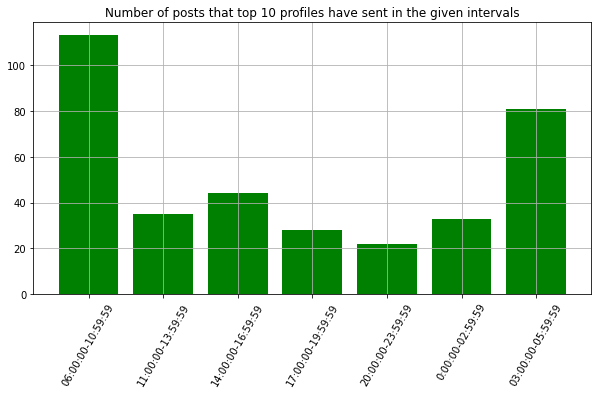

In [198]:
fig = plt.figure(figsize = (10, 5))
plt.bar(['-'.join(i) for i in times], [el[2] for el in time_2], color = "g" )
plt.xticks(rotation=60)
plt.title("Number of posts that top 10 profiles have sent in the given intervals")
plt.grid()
plt.show()

**Interpret the resulting chart :** 
<br>
Most of the posts (54.5 %) of the top 10 posted profiles have been shared early in the morning or late at night. <br>\
In detail:
- 113 out of 356 (31.74 %) between 6 am and 10.59 am.
-  81 out of 356 (22.75 %) between 3 am and 5.59 am.